# Final.ipynb

## Purpose

This is the practical portion of the final.  The goal of this is to test your ability to put pieces together from the previous modules.  This includes up through the ML courses.  We'll touch on a little of everything in this.

Often times we're presented with a need to create fixture data, and to use it in some analysis.  This final will revolve around that central theme.  We'll create a test data set that gives some sort of fixture information, then to analyze it, create a chart, and an ML algorithm on it, and to report the output

## Procedure

This will be one giant problem.  I split it up into separate chunks, and am providing some helper code to get you started.  But, it'll be up to you to fill in the gap.

Please pay close attention to the output, and the types presented. I'm going to setup some "checkpoints", that, if you get stuck, you can move onto the next portion.  Please look for these if you're running into problems completing this final.

Also note.  You should have the same output as me, but in case you don't, that may be still okay depending on the algorithm you used.  Don't be too hung up on having the exact same output as me.

In [1]:
# The below is helper code and functionality, you shouldn't need to modify any of this.

import pandas as pd
import random as rand
import matplotlib.pyplot as plt
import numpy.random as nrand
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

rand.seed(1024)
nrand.seed(1024)

cities = ["San Haven", "Emaca", "Yosoubi"]

curdate = 1
dates = []
while curdate <= 31:
    if curdate < 10:
        dates.append(f"01/0{curdate}/2021")
    else:
        dates.append(f"01/{curdate}/2021")
    curdate += 1

# Part 1: Generate fixtures - Temperatures

We're going to start by creating test populations, test pollution measures, and test temperatures.  The population doesn't change per day, but the pollution and temperatures do.  Ordering is very important in this step.  Note above we have 31 days.  First, generate test temperatures, for each city.  This should be done in the following order, with the following range possibilities:

* San Haven, 0-20
* Emaca, 10-30
* Yosoubi, 50-90

Store these as a dictionary called temperatures

In [2]:
print(f"Temperatures: {temperatures}")
print(f"Length of San Haven Temperatures: {len(temperatures['San Haven'])}")

Temperatures: {'San Haven': [0, 15, 12, 10, 16, 3, 14, 16, 11, 11, 12, 3, 4, 12, 3, 13, 4, 13, 15, 14, 16, 11, 19, 19, 2, 1, 2, 20, 2, 3, 11], 'Emaca': [20, 10, 21, 19, 15, 14, 15, 22, 19, 15, 12, 17, 28, 13, 24, 27, 10, 23, 10, 10, 17, 14, 20, 21, 24, 29, 15, 27, 23, 11, 12], 'Yosoubi': [74, 56, 88, 74, 61, 63, 52, 61, 89, 71, 69, 76, 79, 83, 55, 89, 73, 56, 66, 52, 54, 88, 61, 58, 83, 81, 70, 77, 79, 72, 54]}
Length of San Haven Temperatures: 31


# Part 2: Generate fixtures - pollution

We're going to do the same type of idea above, with pollution.  Pretend these are measures each day

* San Haven, 200-1000
* Emaca, 500-1500
* Yosoubi, 1500-3000

Store these value as a dictionary called pollution

In [3]:
print(f"Pollution: {pollution}")
print(f"Length of San Haven pollution: {len(pollution['San Haven'])}")

Pollution: {'San Haven': [794, 704, 997, 567, 751, 375, 297, 451, 721, 766, 989, 864, 630, 873, 722, 704, 870, 338, 208, 426, 516, 582, 975, 352, 930, 773, 409, 310, 548, 462, 490], 'Emaca': [989, 526, 1494, 1416, 1235, 844, 528, 1062, 892, 645, 751, 963, 1264, 719, 599, 647, 1252, 661, 1335, 1337, 564, 1055, 1092, 1167, 505, 1105, 1147, 841, 871, 999, 1141], 'Yosoubi': [1736, 1926, 2309, 2426, 1639, 2821, 1947, 2792, 2497, 2015, 2877, 2188, 2461, 2461, 2046, 2958, 2749, 2384, 2838, 1905, 1539, 2332, 2387, 2065, 1744, 2143, 2202, 2346, 2219, 2497, 2582]}
Length of San Haven pollution: 31


# Part 3:  Create helper function

If the two previous parts were done properly, you should have near the same logic going on.  Write a helper function that returns a dictionary doing a generic version of what we did in the last two steps.  This won't be used, but should be tested (comment out the function call before moving on)

In [4]:
print(f"Result from generateFixtures: {generateFixtures(cityWithRanges)}")

Result from generateFixtures: {'San Haven': [816, 214, 718, 332, 485, 820, 240, 573, 334, 456, 360, 330, 371, 486, 412, 292, 549, 635, 500, 428, 956, 905, 279, 315, 734, 456, 748, 516, 267, 215, 666], 'Emaca': [913, 935, 1436, 614, 639, 863, 999, 902, 1243, 1195, 507, 926, 1178, 1031, 1104, 1040, 935, 1304, 1228, 1120, 1040, 1353, 1494, 1471, 969, 1146, 1245, 925, 1384, 900, 538], 'Yosoubi': [2052, 2272, 2298, 1858, 2934, 2258, 2352, 1904, 1973, 1764, 2700, 2585, 2653, 2353, 2807, 2428, 2006, 2418, 1897, 1518, 1797, 2124, 2120, 2763, 2340, 1991, 1978, 1790, 1920, 1852, 2037]}


# Part 4: Creating the Data Frame

In this step, we take the fields from before, and create one unified dataframe that represents our data.

The columns should be:
1.  City
2.  Date
3.  Population
4.  Pollution

Do note, the date will be repeated 4 times

Some hints.  You can, and should, loop through the cities to take care of this.  You can set the initial pandas frame to None to start with, then check and either set or append as needed.  Start this problem small, start with how do you get one city.  Note we're dealing with a dictionary before, so you can go one element at a time.  Note that it's not easy to use .from_dict to make this work without some transposition.

In [5]:
pdCityPopulations

,index,Date,City,Pollution,Temperature
0,0,01/01/2021,San Haven,794,0
1,1,01/02/2021,San Haven,704,15
2,2,01/03/2021,San Haven,997,12
3,3,01/04/2021,San Haven,567,10
4,4,01/05/2021,San Haven,751,16
...,...,...,...,...,...
88,26,01/27/2021,Yosoubi,2202,70
89,27,01/28/2021,Yosoubi,2346,77
90,28,01/29/2021,Yosoubi,2219,79
91,29,01/30/2021,Yosoubi,2497,72


# Part 5: Plotting

Using seaborn, produce two plots.  In the first plot, we want a line graph that shows for the X axis the date, the Y axis the Pollution with all 3 cities on the same plot.

Do the same, but with Temperature for the second plot.

For the chart, please make sure the following are included:

1.  The X and Y labels
2.  The legend for the city of interest
3.  The dates

Be mindful that the dates may be long, try to make this readable.  Your theme doesn't need to look the same as mine, but readability of the chart **will** count.

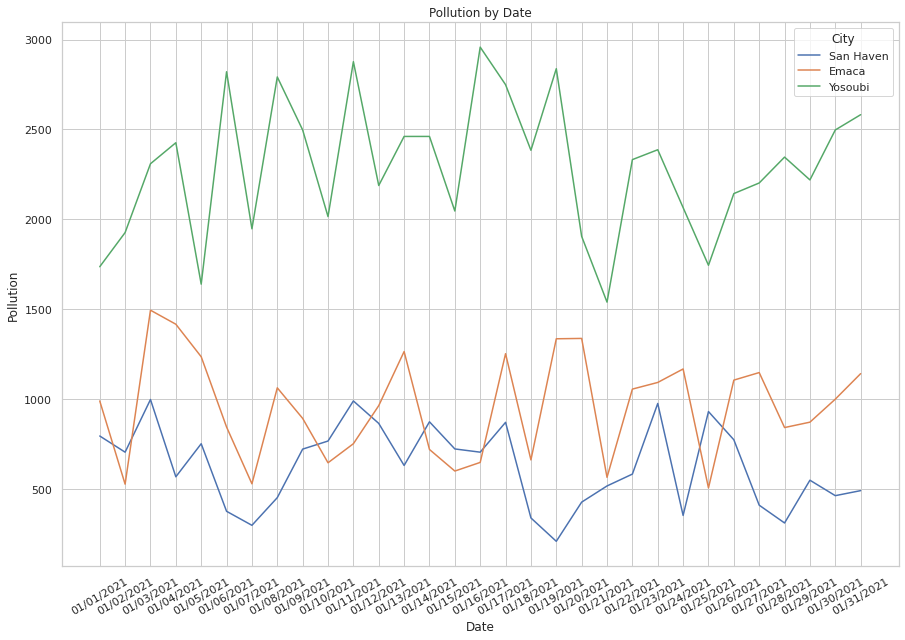

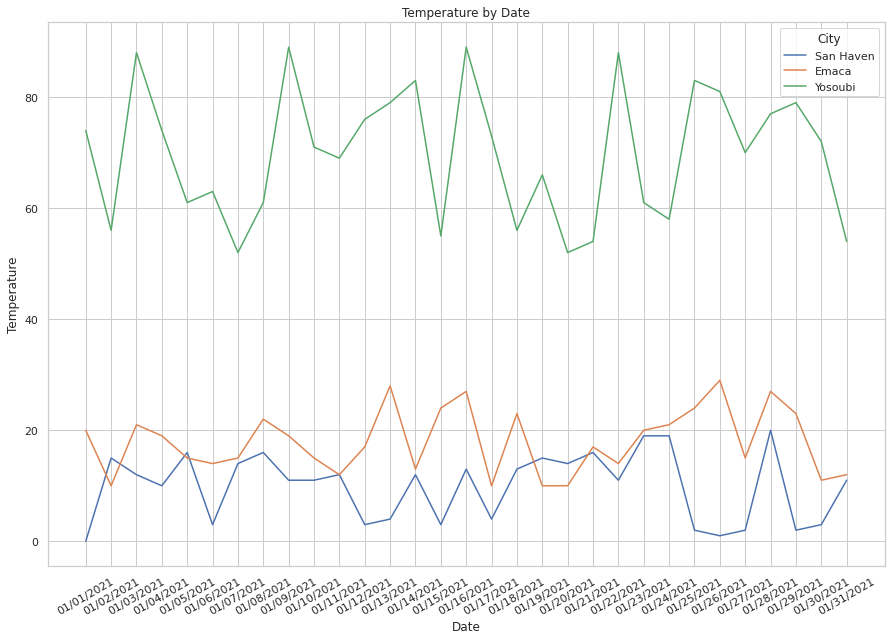

# Part 6: Machine Learning

This is the last part of the task.  Please implement an ML algorithm taking in account the algorithm we used.

For the test_size, please use 0.25.  Think back at the chart we saw in class for what algorithm is appropriate.  The features and target are provided, below.

In [8]:
features = ["Pollution", "Temperature"]
target = "City"

In [9]:
# Test/train sets

In [10]:
# Instantiate ML choice and fit here  # Remember, X = features, y = target

** Your Classifier Information here!**

In [11]:
# Score against training set

0.9130434782608695

In [12]:
# Score against test data set

0.75

# Part 6a:  Create and predict

For this, use the below code, this will test the algorithm

In [13]:
test = [[500, 15], [1000,30]]
your_algorithm.predict(test)

array(['San Haven', 'Emaca'], dtype=object)